<a href="https://colab.research.google.com/github/DanielN8/pythoniframe/blob/main/An%C3%A1lisis_Estad%C3%ADstica_y_probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prueba de hipotesis de dos colas

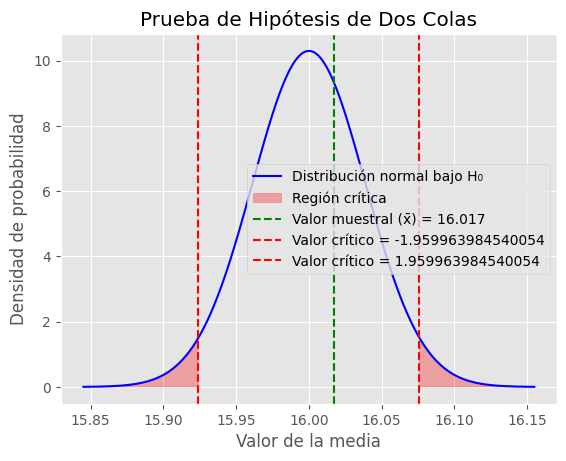

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.style.use('ggplot')

# Datos del problema
mu_0 = 16  # media poblacional
sigma = 0.15  # desviación estándar poblacional
n = 15  # tamaño de la muestra
x_bar = 16.017  # media muestral
alpha = 0.05  # nivel de significancia

# Cálculo del valor z
z = (x_bar - mu_0) / (sigma / np.sqrt(n))

# Valores críticos para una prueba de dos colas con α=0.05
z_critical = norm.ppf(1 - alpha / 2)

# los puntos de la distribución normal
x = np.linspace(mu_0 - 4 * sigma / np.sqrt(n), mu_0 + 4 * sigma / np.sqrt(n), 1000)
y = norm.pdf(x, mu_0, sigma / np.sqrt(n))

# Grafica de la distribución normal
plt.plot(x, y, label='Distribución normal bajo H₀', color='blue')

# Área crítica en las dos colas
plt.fill_between(x, y, where=(x <= mu_0 - z_critical * sigma / np.sqrt(n)) | (x >= mu_0 + z_critical * sigma / np.sqrt(n)),
                 color='red', alpha=0.3, label='Región crítica')

# Marcamos el valor z calculado
plt.axvline(x=x_bar, color='green', linestyle='--', label=f'Valor muestral (x̄) = {x_bar}')

# Marcar los valores críticos
plt.axvline(x=mu_0 - z_critical * sigma / np.sqrt(n), color='red', linestyle='--', label=f'Valor crítico = {-z_critical}')
plt.axvline(x=mu_0 + z_critical * sigma / np.sqrt(n), color='red', linestyle='--', label=f'Valor crítico = {z_critical}')

# Etiquetas y título
plt.title('Prueba de Hipótesis de Dos Colas')
plt.xlabel('Valor de la media')
plt.ylabel('Densidad de probabilidad')
plt.legend(loc='best')

# Imprimir gráfico
plt.grid(True)
plt.show()




```
# This is formatted as code
```

## Prueba de hipotesis de una cola


Estadística de prueba t: 1.46
Valor crítico t para α = 0.05 y 5 grados de libertad: 2.02
Valor p: 0.1020
Decisión: No rechazar la hipótesis nula (H0)



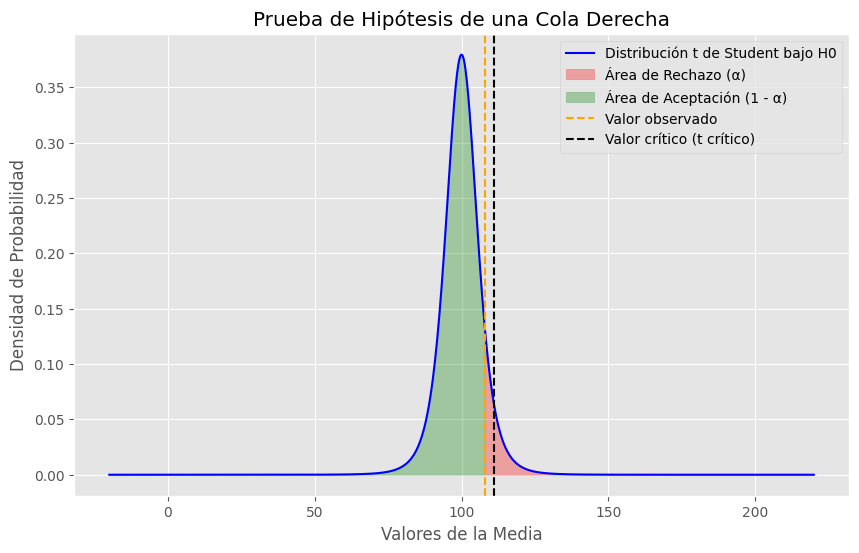

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#instalar librerias, escribir en consola: pip install numpy
# pip install scipy
# pip install matplotlib

# O correr codigo python colab.google: https://colab.google/

# Parámetros del ejemplo con mayor curtosis usando distribución t de Student
mu_0 = 100        # Media de la hipótesis nula (H0)
n = 30            # Tamaño de la muestra
sigma = 30        # Desviación estándar
alpha = 0.05      # Nivel de significancia
X_bar = 108       # Media muestral observada
df = 5            # Grados de libertad bajos para aumentar la curtosis

# Cálculo de la estadística de prueba t
t_stat = (X_bar - mu_0) / (sigma / np.sqrt(n))
print(f'Estadística de prueba t: {t_stat:.2f}')

# Valor crítico t para una cola derecha
t_critico = stats.t.ppf(1 - alpha, df)
print(f'Valor crítico t para α = {alpha} y {df} grados de libertad: {t_critico:.2f}')

# Valor p para la estadística de prueba
p_value = 1 - stats.t.cdf(t_stat, df)
print(f'Valor p: {p_value:.4f}')

# Decisión basada en el valor crítico
if t_stat > t_critico:
    decision = "Rechazar la hipótesis nula (H0)"
else:
    decision = "No rechazar la hipótesis nula (H0)"

print(f'Decisión: {decision}')
print()

# Graficación de la distribución t de Student
x = np.linspace(mu_0 - 4*sigma, mu_0 + 4*sigma, 1000)
y = stats.t.pdf((x - mu_0) / (sigma / np.sqrt(n)), df)

# Configuración de la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribución t de Student bajo H0', color='blue')
plt.fill_between(x, 0, y, where=(x >= X_bar), color='red', alpha=0.3, label='Área de Rechazo (α)')
plt.fill_between(x, 0, y, where=(x < X_bar), color='green', alpha=0.3, label='Área de Aceptación (1 - α)')
plt.axvline(X_bar, color='orange', linestyle='--', label='Valor observado')
plt.axvline(mu_0 + t_critico * (sigma / np.sqrt(n)), color='black', linestyle='--', label='Valor crítico (t crítico)')

# Etiquetas y leyendas
plt.title('Prueba de Hipótesis de una Cola Derecha')
plt.xlabel('Valores de la Media')
plt.ylabel('Densidad de Probabilidad')
plt.legend(loc='upper right')
plt.grid(True)

# Mostrar la gráfica
plt.show()

# Prueba de la media poblacional: desviación estándar de la población desconocida Y Error de Tipo I y Tipo II

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import ipywidgets as widgets
from IPython.display import display

# Datos recopilados de 20 personas a la cual se les preguntó cuantos minutos hacen ejercicio
datos = [140, 155, 160, 145, 170, 150, 160, 135, 150, 160, 155, 145, 165, 170, 150, 140, 155, 150, 160, 155]
mu_0 = 150  # Media poblacional bajo la hipótesis nula

# Función para calcular y graficar, mostrando cada paso
def calcular_y_graficar(alpha):
    # Paso 1: Tamaño de la muestra (n)
    n = len(datos)
    print(f"Tamaño de la muestra (n): {n}")

    # Paso 2: Suma de los valores de la muestra
    suma_muestra = np.sum(datos)
    print(f"Suma de los valores de la muestra: {suma_muestra:.2f}")

    # Paso 3: Media de la muestra
    media_muestra = np.mean(datos)
    print(f"Media de la muestra: {media_muestra:.2f}")

    # Paso 4: Varianza de la muestra
    varianza_muestra = np.var(datos, ddof=1)
    print(f"Varianza de la muestra: {varianza_muestra:.2f}")

    # Paso 5: Desviación estándar de la muestra
    desviacion_estandar = np.std(datos, ddof=1)
    print(f"Desviación estándar de la muestra: {desviacion_estandar:.2f}")

    # Paso 6: Error estándar
    error_estandar = desviacion_estandar / np.sqrt(n)
    print(f"Error estándar: {error_estandar:.2f}")

    # Paso 7: Estadístico t calculado
    t_calculado = (media_muestra - mu_0) / error_estandar
    print(f"Estadístico de prueba t: {t_calculado:.2f}")

    # Paso 8: Valor crítico para la prueba de dos colas
    t_critico = t.ppf(1 - alpha / 2, df=n - 1)
    print(f"Valor crítico t para α = {alpha} y {n - 1} grados de libertad: {t_critico:.2f}")

    # Paso 9: Calcular el p-valor para evaluar la significancia del estadístico t
    p_valor = 2 * (1 - t.cdf(abs(t_calculado), df=n - 1))
    print(f"Valor p: {p_valor:.4f}")

    # Paso 10: Decisión de la prueba de hipótesis
    if abs(t_calculado) > t_critico:
        decision = "Rechazar la hipótesis nula (H0)"
    else:
        decision = "No rechazar la hipótesis nula (H0)"
    print(f"Decisión: {decision}")

    # Visualización: Crear el gráfico para ilustrar la prueba de hipótesis
    x = np.linspace(-4, 4, 500)
    t_null = t.pdf(x, df=n - 1)

    plt.figure(figsize=(12, 8))
    plt.plot(x, t_null, label="Distribución bajo $H_0$: $\mu = 150$", color="blue")
    plt.fill_between(x, 0, t_null, where=(x >= t_critico) | (x <= -t_critico), color="blue", alpha=0.2, label="Región de rechazo (Error Tipo I)")

    # Marcar el valor crítico y el valor calculado de t en el gráfico
    plt.axvline(x=t_critico, color="blue", linestyle="--", label=f"Valor crítico $t = {t_critico:.2f}$")
    plt.axvline(x=-t_critico, color="blue", linestyle="--")
    plt.axvline(x=t_calculado, color="red", linestyle="--", label=f"Valor calculado $t = {t_calculado:.2f}$")
    plt.text(t_calculado, 0.1, "$t$ calculado", color="red", ha="center")

    # Anotaciones de errores Tipo I y Tipo II en el gráfico
    plt.text(t_critico, 0.05, "Valor crítico", color="blue", ha="center")
    plt.text(-t_critico, 0.05, "Valor crítico", color="blue", ha="center")
    plt.text(3, 0.15, "Error Tipo I\nRegión de rechazo", color="blue", ha="center", fontsize=10)
    plt.text(0, 0.15, "Error Tipo II\nRegión de no rechazo", color="green", ha="center", fontsize=10)

    # Títulos del gráfico
    plt.title("Prueba de la media poblacional (Desviación estándar desconocida) y Errores Tipo I y Tipo II")
    plt.xlabel("Valores de $t$")
    plt.ylabel("Densidad de probabilidad")
    plt.legend()
    plt.grid(True)
    plt.show()

# Slider para ajustar el nivel de significancia α con sus probabilidades de rechazo 1%, 5% y 10%
alpha_slider = widgets.FloatSlider(value=0.05, min=0.01, max=0.10, step=0.01, description='α:')
display(alpha_slider)
widgets.interactive_output(calcular_y_graficar, {'alpha': alpha_slider})


FloatSlider(value=0.05, description='α:', max=0.1, min=0.01, step=0.01)

Output()